In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd//content/drive/MyDrive/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set

/content/drive/.shortcut-targets-by-id/1u5ePHYkmRcF1q29SQcU9xDjbB_jJxqot/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set


In [3]:
ls

Pepper,_bell___Bacterial_spot/  Tomato___Bacterial_spot/
Pepper,_bell___healthy/         Tomato___Late_blight/
Potato___Early_blight/          Tomato___Leaf_Mold/
Potato___healthy/               Tomato___Septoria_leaf_spot/
Potato___Late_blight/


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [6]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
pwd

'/content/drive/.shortcut-targets-by-id/1u5ePHYkmRcF1q29SQcU9xDjbB_jJxqot/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set'

In [8]:
x_train=train_datagen.flow_from_directory(r"/content/drive/.shortcut-targets-by-id/1u5ePHYkmRcF1q29SQcU9xDjbB_jJxqot/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [9]:
x_test=test_datagen.flow_from_directory(r"/content/drive/.shortcut-targets-by-id/1u5ePHYkmRcF1q29SQcU9xDjbB_jJxqot/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [10]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [13]:
model=Sequential()

In [14]:
model.add(Convolution2D(64,(3,3),input_shape=(64,64,3),activation='relu'))

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Flatten())

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.add(Dense(300,input_dim=4,activation='relu'))

In [19]:
model.add(Dense(150,activation='relu'))

In [20]:
model.add(Dense(9,activation='softmax'))

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
len(x_train)

475

In [23]:
len(x_test)

475

In [24]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
475/475 [==============================] - 3819s 8s/step - loss: 1.0647 - accuracy: 0.6422 - val_loss: 0.6559 - val_accuracy: 0.7679
Epoch 2/10
475/475 [==============================] - 212s 446ms/step - loss: 0.5407 - accuracy: 0.8083 - val_loss: 0.4214 - val_accuracy: 0.8538
Epoch 3/10
475/475 [==============================] - 213s 449ms/step - loss: 0.4307 - accuracy: 0.8528 - val_loss: 0.3220 - val_accuracy: 0.8866
Epoch 4/10
475/475 [==============================] - 215s 453ms/step - loss: 0.3459 - accuracy: 0.8791 - val_loss: 0.2723 - val_accuracy: 0.9046
Epoch 5/10
475/475 [==============================] - 243s 511ms/step - loss: 0.2985 - accuracy: 0.8962 - val_loss: 0.3294 - val_accuracy: 0.8785
Epoch 6/10
475/475 [==============================] - 228s 480ms/step - loss: 0.2890 - accuracy: 0.8994 - val_loss: 0.2548 - val_accuracy: 0.9095
Epoch 7/10
475/475 [==============================] - 224s 472ms/step - loss: 0.2313 - accuracy: 0.9207 - val_loss: 0.2715 - v

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 300)               18451500  
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 9)                 1359      
                                                        

In [26]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
ls

Pepper,_bell___Bacterial_spot/  Tomato___Bacterial_spot/
Pepper,_bell___healthy/         Tomato___Late_blight/
Potato___Early_blight/          Tomato___Leaf_Mold/
Potato___healthy/               Tomato___Septoria_leaf_spot/
Potato___Late_blight/


In [28]:
model.save('Vegetables.h5')

OSError: ignored

In [29]:
model=load_model('Vegetables.h5')

OSError: ignored

In [30]:
img=image.load_img(r"/content/drive/MyDrive/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Potato___Early_blight/042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG")

In [31]:
x=image.img_to_array(img)

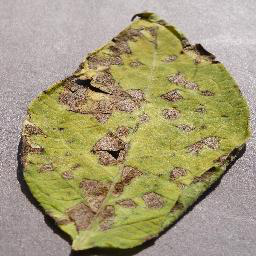

In [32]:
img

In [35]:
x

array([[[[136., 131., 128.],
         [120., 115., 112.],
         [137., 132., 129.],
         ...,
         [172., 170., 171.],
         [165., 163., 164.],
         [167., 165., 166.]],

        [[140., 135., 132.],
         [136., 131., 128.],
         [146., 141., 138.],
         ...,
         [171., 169., 170.],
         [165., 163., 164.],
         [172., 170., 171.]],

        [[134., 129., 126.],
         [138., 133., 130.],
         [130., 125., 122.],
         ...,
         [165., 163., 164.],
         [169., 167., 168.],
         [177., 175., 176.]],

        ...,

        [[132., 128., 129.],
         [123., 119., 120.],
         [126., 122., 123.],
         ...,
         [146., 144., 147.],
         [150., 148., 151.],
         [138., 136., 139.]],

        [[117., 113., 114.],
         [139., 135., 136.],
         [132., 128., 129.],
         ...,
         [144., 142., 145.],
         [143., 141., 144.],
         [144., 142., 145.]],

        [[108., 104., 105.],
       

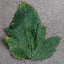

In [36]:
img

In [34]:
img=image.load_img(r"/content/drive/MyDrive/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Tomato___Bacterial_spot/b16f21dc-39eb-45b5-a588-da778fa9ac44___GCREC_Bact.Sp 6351.JPG",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Tomato___Bacterial_spot',
       'Pepper,_bell___healthy','Tomato___Late_blight','Potato___Early_blight',
       'Tomato___Leaf_Mold','Potato___healthy','Tomato___Septoria_leaf_spot','Potato___Late_blight']
index[y[0]]

1/1 [==============================] - 0s 266ms/step


'Potato___Late_blight'